In [ ]:
# Project description.
# Detect whether a person is sleeping or not from a video. Good to be implemented on smart TVs using 
# Adroid/WebOS.

In [1]:
# Importing necessary modules.
import cv2
import matplotlib.pyplot as plt
import numpy as np


(1280, 960)


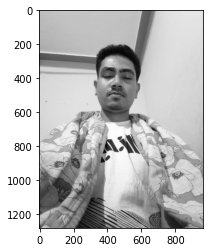

In [10]:
# Importing the image to the env.
# img_1 = cv2.imread('data/training_raw/open_eye_person/1_6.jpg')
img_1 = cv2.imread('data/testing/closed_0.jpg')
# Converting the image to gray sclale.
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print(img_1.shape)

# Displaying the image.
plt.imshow(img_1, cmap='gray')
plt.show()


(312, 312)


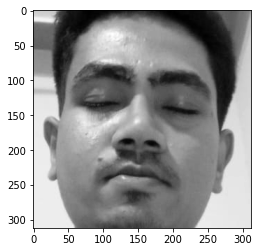

In [11]:
# Now detecting face from the image.
trained_face_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_coordinates = trained_face_data.detectMultiScale(img_1)

img_1_face = []
# Draw rectangles around the faces
for (x, y, w, h) in face_coordinates:
    img_1_face.append(img_1[y:y + h, x:x + w])
    
# Converting the croped image to numpy array.
img_1_face = np.array(img_1_face[0])
print(img_1_face.shape)

plt.imshow(img_1_face, cmap='gray')
plt.show()

(80, 80)


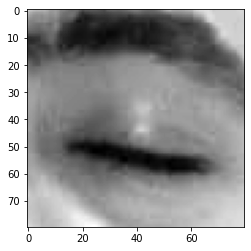

In [12]:
# Now detecting eye from the face. We will just detect the left eye. If a person is sleeping then both the eyes
# should be closed. Due to mirroring effect the the left eye detector seems to be detecting as the rigth eye 
# of the photo. 
trained_eye_data = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
eye_coordinates = trained_eye_data.detectMultiScale(img_1_face)

img_1_eye = []
# Draw rectangles around the faces
for (x, y, w, h) in eye_coordinates:
    img_1_eye.append(img_1_face[y:y + h, x:x + w])
    
# Converting the croped image to numpy array.
img_1_eye = np.array(img_1_eye[0])
print(img_1_eye.shape)

plt.imshow(img_1_eye, cmap='gray')
plt.show()

# Saving the image to a specific path. Used only for collecting the data.
# cv2.imwrite('data/training/closed_eye/0_7.jpg', img_1_eye)

In [13]:
# Importing our Machine Learning Model to test it.
from sklearn.linear_model import LogisticRegression
# For saving the file.
import pickle

filename = 'logistic_regression_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Reshaping the image to expected 32*32 pixel format.
img_1_eye = cv2.resize(img_1_eye, (32, 32))
# Flattening the image.
img_1_eye = img_1_eye.reshape(32*32)

predictions = loaded_model.predict([img_1_eye])

print(predictions[0])

print('The prediciton is', predictions[0])


0
The prediciton is 0


## Doing Machine Learning to Classify open and closed eyes.

In [7]:
# Importing necessary modules.
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


### Getting the data imported in to our environment

In [41]:
classes = ['Closed', 'Open']
X = []
y = []

# Lists all the file names from the Source folder
# Getting data for Open eyes.
base_path = 'data/training/open_eye/'
files = os.listdir(base_path)
files = [file for file in files if file[-1] != '~']
print('No. of files: ', len(files))

for file in files:
    # Creating the File path (Image Path).
    file_path = base_path + file
    # Opening the Image using OpenCV
    inst_img = cv2.imread(file_path)
    # Converting the image to 32*32 pixel images.
    inst_img = cv2.resize(inst_img, (32, 32))
    # Using just one channel of the image by converting it to graysclae image.
    inst_img = cv2.cvtColor(inst_img, cv2.COLOR_BGR2GRAY)
    # Converting the img to a Numpy Array
    inst_img_arr = np.array(inst_img)
    # Adding the Image Array to the Container Array. 
    X.append(inst_img_arr)
    
    # The other thing is to use grab the label from the Image name.
    inst_label = int(file[0])
    # Append the label to the 'y' Array.
    y.append(inst_label)
    
# Getting data for Closed eyes.
base_path = 'data/training/closed_eye/'
files = os.listdir(base_path)
files = [file for file in files if file[-1] != '~']
print('No. of files: ', len(files))

for file in files:
    # Creating the File path (Image Path).
    file_path = base_path + file
    # Opening the Image using OpenCV
    inst_img = cv2.imread(file_path)
    # Converting the image to 32*32 pixel images.
    inst_img = cv2.resize(inst_img, (32, 32))
    # Using just one channel of the image by converting it to graysclae image.
    inst_img = cv2.cvtColor(inst_img, cv2.COLOR_BGR2GRAY)
    # Converting the img to a Numpy Array
    inst_img_arr = np.array(inst_img)
    # Adding the Image Array to the Container Array. 
    X.append(inst_img_arr)
    
    # The other thing is to use grab the label from the Image name.
    inst_label = int(file[0])
    # Append the label to the 'y' Array.
    y.append(inst_label)
    
# Converting both X and y to Numpy Arrays for Efficient Computaion.
X = np.array(X)
y = np.array(y).reshape(len(X), -1)

print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)


No. of files:  8
No. of files:  8
Shape of X:  (16, 32, 32)
Shape of y:  (16, 1)


Shape of the Image:  (32, 32, 3)


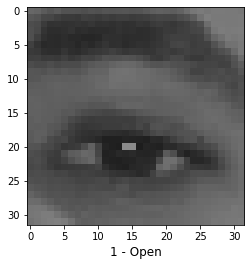

In [42]:
# Let's show one of the Image from our X Array.
index = 0

img = X[index]
# Converting BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = y[index][0]
class_ = classes[label]

print('Shape of the Image: ', img.shape)

plt.imshow(img)
plt.xlabel('{} - {}'.format(label, class_), size=12)
plt.show()

In [43]:
# Flattening the elements of X.
X_train_flatten = X.reshape(16, 32*32)

In [44]:
# Using Logistic Regression for Classificaiton.
from sklearn.linear_model import LogisticRegression
# Using Accuracy for testing.
from sklearn.metrics import accuracy_score
# For saving the file.
import pickle

# Logistic Regression
model_t = LogisticRegression()
print(model_t)
model_t.fit(X_train_flatten, y)

predictions = model_t.predict(X_train_flatten)
accuracy = accuracy_score(y, predictions)
print('Accurace on training data itself:', accuracy)

# Saving our Logistic Regression Model. Only used while saving the model.
# filename = 'logistic_regression_model.sav'
# pickle.dump(model_t, open(filename, 'wb'))
# print('Model saved.')

LogisticRegression()
Accurace on training data itself: 1.0
Model saved.


/home/sai-nilayam/personal/dev/venvs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
